<a href="https://colab.research.google.com/github/flipfelly/MLP-Practices/blob/main/Pattern_Classification_with_Perceptron_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern Classification with Perceptron Networks

## Problem Description

Consider a pattern classification problem consisting of eight distinct classes. The pattern distribution forms a circle centered at the origin with a unit radius. Within this circle, there is a diamond also centered at the origin, with sides equal to the square root of 1.

The classes are distributed as follows:

- **C1, C2, C3, and C4**: Correspond to the four sectors within the diamond.
- **C5, C6, C7, and C8**: Correspond to the sectors defined by the circle and the sides of the diamond.

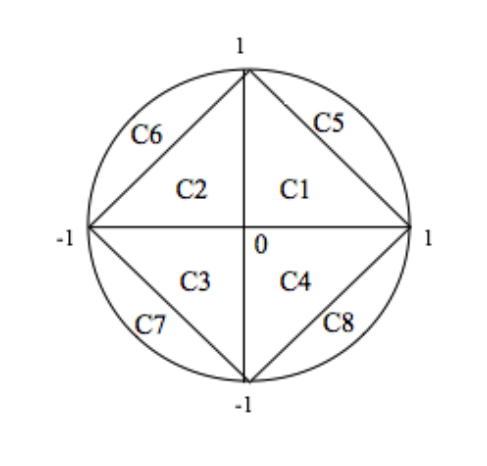

## Data Generation

The data is randomly generated to form the distributions described above. After generation, the data is divided into two sets:

- **Training set**
- **Validation set**

## Training Perceptron Networks

Two perceptron networks will be trained to classify the patterns:

1. **Network using the Conventional Delta Rule**
2. **Network using the Delta Rule with Momentum Term**

## Performance Evaluation

The performance of the networks will be evaluated using the validation set. The analysis will be conducted through the **confusion matrix**, which allows visualization of classification successes and errors.

## Objective

The objective of this study is to compare the performances of the two training methods, determining which one yields better results in classifying the defined patterns.



In [1]:
#importando bibliotecas necessarias
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generating Data

In [17]:

def generate_data(n_samples=1000):
    np.random.seed(42)

    # Generating random points within a unit circle
    angles = np.random.uniform(0, 2 * np.pi, n_samples)
    radii = np.sqrt(np.random.uniform(0, 1, n_samples))

    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    X = np.vstack((x, y)).T

    # Classification based on region
    labels = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        if abs(X[i, 0]) + abs(X[i, 1]) <= np.sqrt(1):  # Inside the diamond
            if X[i, 0] >= 0 and X[i, 1] >= 0:
                labels[i] = 0  # C1
            elif X[i, 0] < 0 and X[i, 1] >= 0:
                labels[i] = 1  # C2
            elif X[i, 0] < 0 and X[i, 1] < 0:
                labels[i] = 2  # C3
            else:
                labels[i] = 3  # C4
        else:  # Outside the diamond but inside the circle
            if X[i, 0] >= 0 and X[i, 1] >= 0:
                labels[i] = 4  # C5
            elif X[i, 0] < 0 and X[i, 1] >= 0:
                labels[i] = 5  # C6
            elif X[i, 0] < 0 and X[i, 1] < 0:
                labels[i] = 6  # C7
            else:
                labels[i] = 7  # C8

    return X, labels

# Generate data
X, y = generate_data(2000)

print(X, y)


[[-0.36068912  0.3627796 ]
 [ 0.47333068 -0.15144922]
 [-0.10747235 -0.94588809]
 ...
 [ 0.57010585  0.26372643]
 [ 0.68169262  0.25541293]
 [-0.08068722  0.39351865]] [1 3 6 ... 0 0 1]


# **Plotting Data with Diamond Boundary Highlighted**

This function visualizes the data distribution with a **diamond boundary** separating different regions.


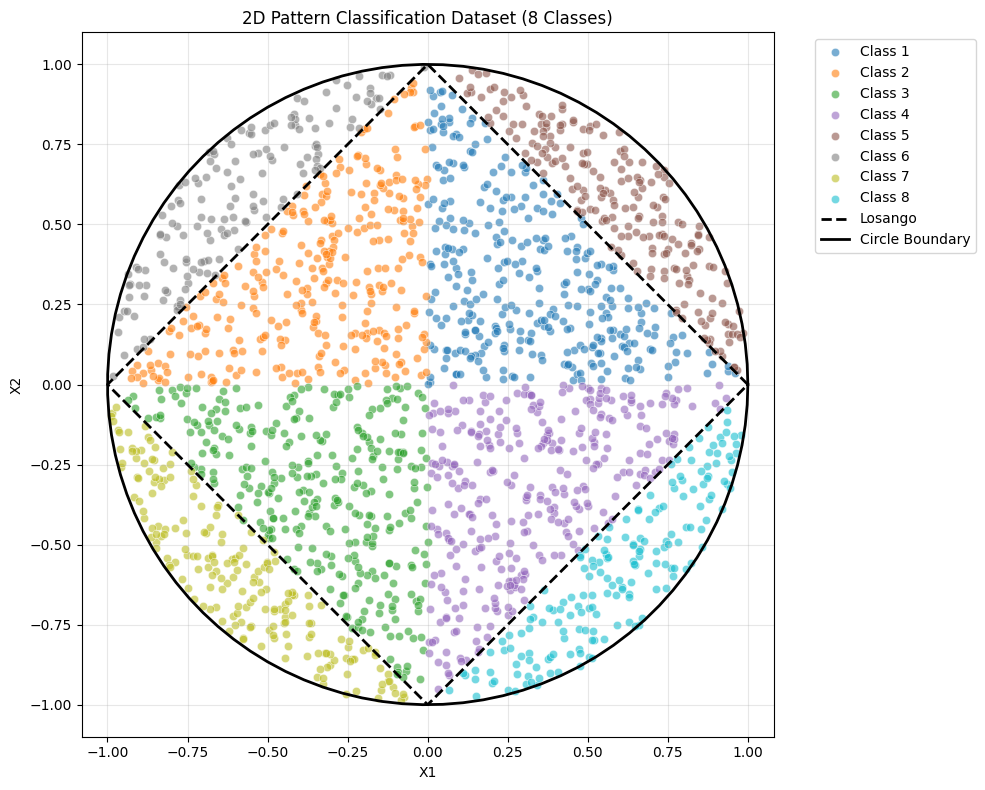

In [19]:


# Create plot
plt.figure(figsize=(10, 8))

# Plot data points with different colors for each class
colors = plt.cm.tab10(np.linspace(0, 1, 8))
for class_id in range(8):
    mask = (y == class_id)
    plt.scatter(X[mask, 0], X[mask, 1],
                color=colors[class_id],
                label=f'Class {class_id+1}',
                alpha=0.6,
                edgecolors='w',
                linewidth=0.5)

# Plot diamond boundary (L1 norm)
theta = np.linspace(0, 2*np.pi, 100)
diamond_x = [1, 0, -1, 0, 1]
diamond_y = [0, 1, 0, -1, 0]
plt.plot(diamond_x, diamond_y, 'k--', linewidth=2, label='Losango')

# Plot unit circle boundary
circle_radius = 1
circle_x = circle_radius * np.cos(theta)
circle_y = circle_radius * np.sin(theta)
plt.plot(circle_x, circle_y, 'k-', linewidth=2, label='Circle Boundary')

# Add plot decorations
plt.title('2D Pattern Classification Dataset (8 Classes)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Perceptron Model for Classification**
This script trains a simple **Perceptron** using **TensorFlow/Keras** to classify points based on their region.  

## **1. Data Splitting**
- The dataset is split into **training (80%)** and **testing (20%)** using `train_test_split()`.  

## **2. Perceptron Model**
- The model consists of:
  - **1 Dense Layer** with 8 neurons (one per class).  
  - **Softmax Activation** for multi-class classification.  
  - **SGD Optimizer** with optional momentum.  
  - **Sparse Categorical Crossentropy Loss**, since the labels are integer-encoded.  

## **3. Confusion Matrix Visualization**
- After training, a **confusion matrix** is plotted using `seaborn.heatmap()` to evaluate the classification performance.  
- The **x-axis represents the predicted labels**, and the **y-axis represents the actual labels**.  

In [21]:
#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron Model
def create_perceptron(momentum=0.0):
    model = Sequential([
         Dense(8, activation='softmax', input_shape=(2,)),
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momentum),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# **Conventional Delta Rule - Perceptron Training**

This script trains a Perceptron **without momentum** using the **Conventional Delta Rule** and evaluates its performance.

## **1. Model Training**
- The Perceptron is created with:
  - **No momentum (SGD optimizer with 0 momentum).**
  - **Softmax activation** for multi-class classification.
  - **Sparse Categorical Crossentropy Loss**.
- The model is trained for **50 epochs** using training data.

## **2. Model Evaluation**
- Predictions are generated on the **test set**.
- A **confusion matrix** is plotted to visualize classification performance.
- A **classification report** is printed with precision, recall, and F1-score.

## **3. Error Curve Analysis**
- A loss curve is plotted to observe the model's **training and validation errors** over epochs.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


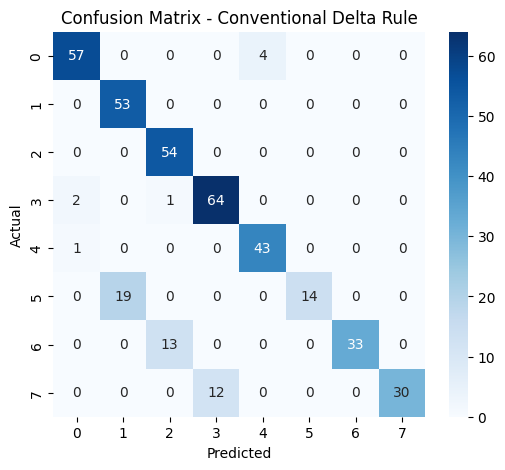

Conventional Delta Rule:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        61
           1       0.74      1.00      0.85        53
           2       0.79      1.00      0.89        54
           3       0.84      0.96      0.90        67
           4       0.91      0.98      0.95        44
           5       1.00      0.42      0.60        33
           6       1.00      0.72      0.84        46
           7       1.00      0.71      0.83        42

    accuracy                           0.87       400
   macro avg       0.90      0.84      0.85       400
weighted avg       0.89      0.87      0.86       400



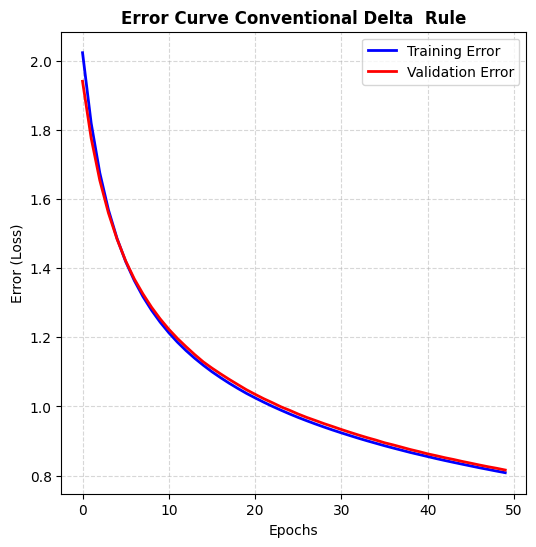

In [24]:

model_delta = create_perceptron(momentum=0.0)  # No momentum

# Train the model
history_delta = model_delta.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

y_pred_delta = np.argmax(model_delta.predict(X_test), axis=1)

#confusion matrix
plot_confusion_matrix(y_test, y_pred_delta, "Confusion Matrix - Conventional Delta Rule")

# performance metrics
print("Conventional Delta Rule:\n", classification_report(y_test, y_pred_delta))

# loss curve
plt.figure(figsize=(6, 6))
plt.plot(history_delta.history['loss'], label='Training Error', lw=2, color='blue')
plt.plot(history_delta.history['val_loss'], label='Validation Error', lw=2, color='red')
plt.title('Error Curve Conventional Delta  Rule', fontsize=12, fontweight='bold')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Error (Loss)', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# **Delta Rule with Momentum - Perceptron Training**

This script trains a Perceptron **with momentum** using the **Delta Rule** and evaluates its performance.

## **1. Model Training**
- The Perceptron is created with:
  - **Momentum = 0.9** (SGD optimizer with momentum).
  - **Softmax activation** for multi-class classification.
  - **Sparse Categorical Crossentropy Loss**.
- The model is trained for **50 epochs** using training data.

## **2. Model Evaluation**
- Predictions are generated on the **test set**.
- A **confusion matrix** is plotted to visualize classification performance.
- A **classification report** is printed with precision, recall, and F1-score.

## **3. Error Curve Analysis**
- A loss curve is plotted to observe the model's **training and validation errors** over epochs.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


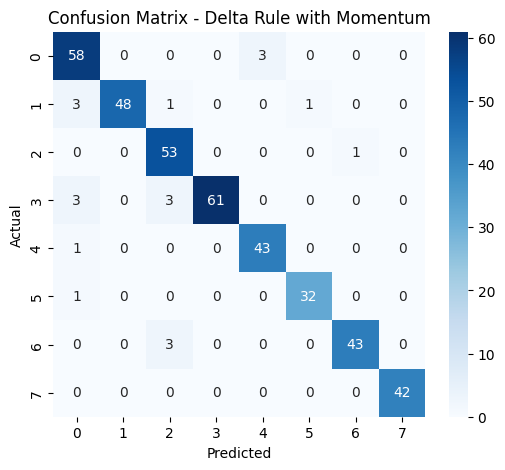


Delta Rule with Momentum:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        61
           1       1.00      0.91      0.95        53
           2       0.88      0.98      0.93        54
           3       1.00      0.91      0.95        67
           4       0.93      0.98      0.96        44
           5       0.97      0.97      0.97        33
           6       0.98      0.93      0.96        46
           7       1.00      1.00      1.00        42

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



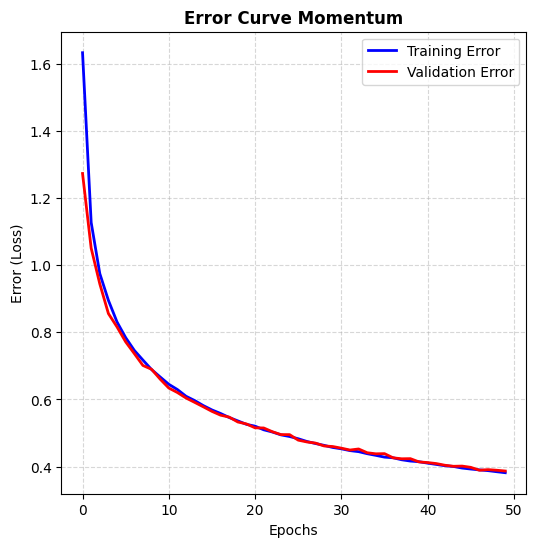

In [25]:

model_momentum = create_perceptron(momentum=0.9)  # With momentum

# Train the model
history_momentum = model_momentum.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

y_pred_momentum = np.argmax(model_momentum.predict(X_test), axis=1)

# confusion matrix
plot_confusion_matrix(y_test, y_pred_momentum, "Confusion Matrix - Delta Rule with Momentum")

#performance metrics
print("\nDelta Rule with Momentum:\n", classification_report(y_test, y_pred_momentum))

#loss curve
plt.figure(figsize=(6, 6))
plt.plot(history_momentum.history['loss'], label='Training Error', lw=2, color='blue')
plt.plot(history_momentum.history['val_loss'], label='Validation Error', lw=2, color='red')
plt.title('Error Curve Momentum', fontsize=12, fontweight='bold')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Error (Loss)', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
